<function matplotlib.pyplot.show(*args, **kw)>

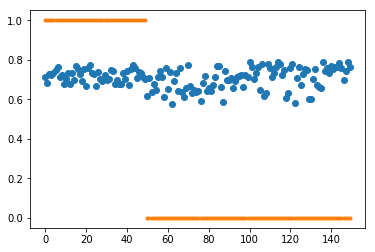

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import torch
import torch.autograd
from torch.autograd import Variable

# The sizes of layers from input to output
sizes = [4,2,1]
#sizes = [1,2,1]
#x = Variable(torch.randn(sizes[0],1).double(), requires_grad=True)

# Generate the network
g = torch.sigmoid


D = len(sizes)
Weight = []
Bias = []
Func = []

for i in range(D-1):
    
    # For layer i, Weights are a S_{i+1} \times S_{i} matrix
    W = Variable(torch.randn(sizes[i+1],sizes[i]).double(), requires_grad=True)
    # For layer i, Biases are a S_{i+1} \times 1 matrix (a vector)
    b = Variable(torch.randn(sizes[i+1],1).double(), requires_grad=True)

    Weight.append(W)
    Bias.append(b)
    Func.append(g)

    
# Define the exact functional form
def mlp_fun(x, Weight, Bias, Func):
    f = Variable(x, requires_grad=False).reshape(sizes[0], 1)
    NumOfLayers = len(Weight)
    for i in range(NumOfLayers):
        f = torch.matmul(Weight[i], f)
        f = Func[i](f + Bias[i])
    return f

df_iris = pd.read_csv(u'data/iris.txt',sep=' ')
fields = ['sl','sw','pl','pw','c']

features = np.array(df_iris[fields[0:4]])
target = np.array(df_iris[fields[4]])
target[target > 1] = 0

features = Variable(torch.from_numpy(features).double(),requires_grad=False)
target = Variable(torch.from_numpy(target).double(),requires_grad=False)

Result = []

for i in range(len(features)):
    f = mlp_fun(features[i,:], Weight, Bias, Func)
    Result.append(f)

plt.plot(Result,'o')
plt.plot(target.data.numpy().squeeze(),'.')
plt.show


/Users/onurasiliskender/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


0 : 1.0671370203783426
1000 : 0.6950243548981315
2000 : 0.6940610736219106
3000 : 0.6937510246477739
4000 : 0.6935981510751698


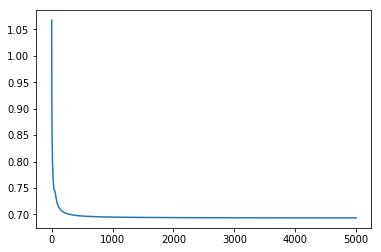

In [20]:
eta = 0.005
MAX_ITER = 5000
EE = []
Error = torch.nn.BCELoss(reduction='elementwise_mean')
N= 150
BatchSize = min(10, N)


for epoch in range(MAX_ITER):

    idx = np.random.choice(N, size=BatchSize, replace=False)    
    for i in range(len(features)):
        
        #r = idx[i]
        r = i

        f = mlp_fun(torch.DoubleTensor(features[r,:]), Weight, Bias, Func)

        #E = Error(f, target[r].reshape(sizes[-1], 1))

        E = -target[r]*f + torch.log(1+torch.exp(f))
        

        
        E.backward()

        for i in range(D-1):
            Weight[i].data.add_(-eta*Weight[i].grad.data)
            Bias[i].data.add_(-eta*Bias[i].grad.data)
            Weight[i].grad.zero_()
            Bias[i].grad.zero_()
    
    EE.append(E.data.numpy())

    
    if epoch%1000 == 0: 
        print(epoch,':',E.item())

EE = np.squeeze(EE, axis=(2,))
plt.plot(EE)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

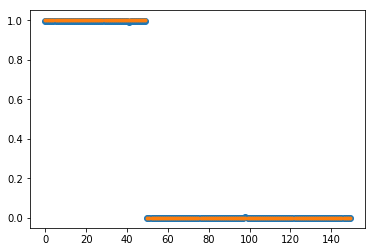

In [21]:
ResultFinal = []

for i in range(len(features)):
    f = mlp_fun(features[i,:], Weight, Bias, Func)
    #ResultFinal.append(f.round())
    ResultFinal.append(f)




plt.plot(ResultFinal,'o')
plt.plot(target.data.numpy().squeeze(),'.')
plt.show


#confusion_matrix = np.zeros((2,2))

#for i in range(len(Result)):
#    confusion_matrix[int(target[i]), int(Result[i])] += 1
    
#print(confusion_matrix)

#accuracy = np.sum(np.diag(confusion_matrix))/np.sum(confusion_matrix)

#print("Accuracy:", accuracy*100, "%")
